In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [4]:
df = pd.read_csv("uber.csv")
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [7]:
df.drop(columns=['Unnamed: 0','key'],inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_datetime    200000 non-null  object 
 2   pickup_longitude   200000 non-null  float64
 3   pickup_latitude    200000 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 10.7+ MB


#### Dropping null rows

In [11]:
df.dropna(how='any',inplace=True)

In [13]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

### Boxplots

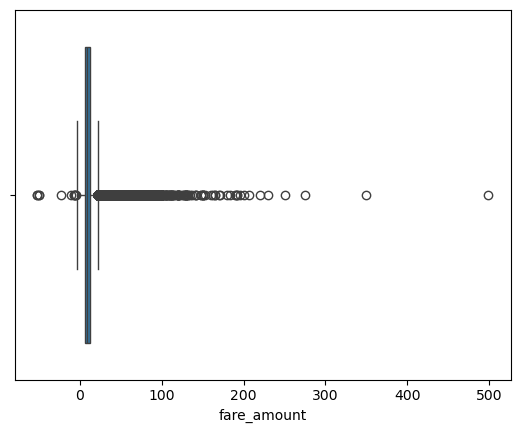

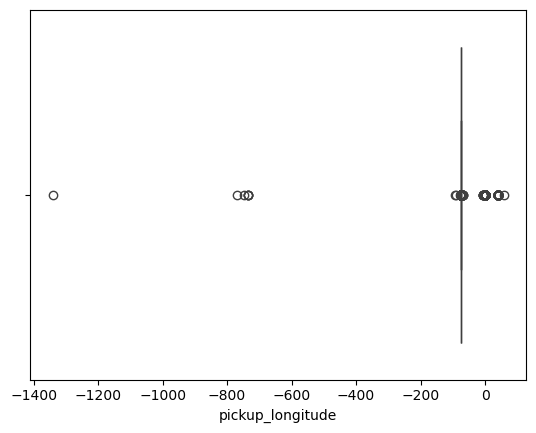

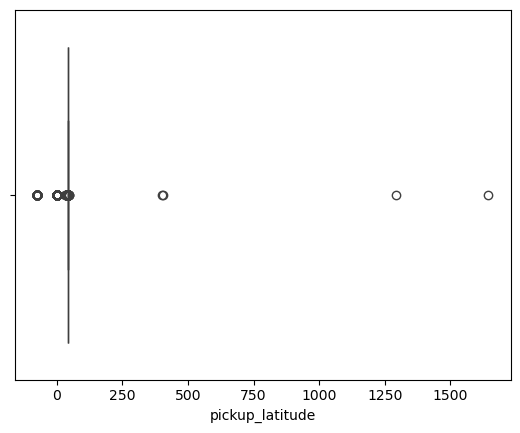

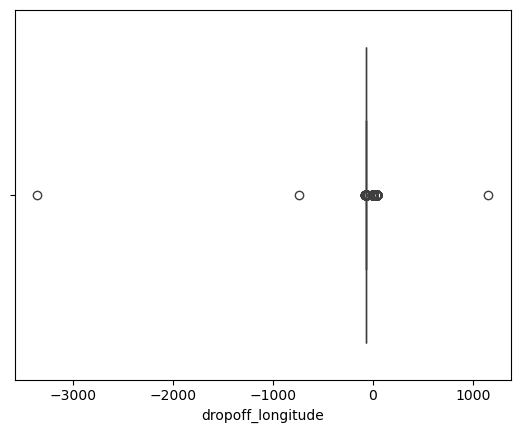

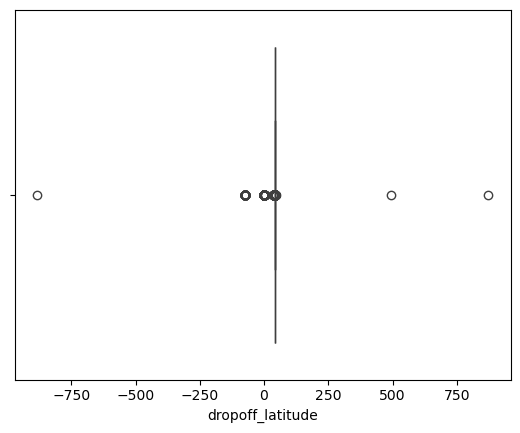

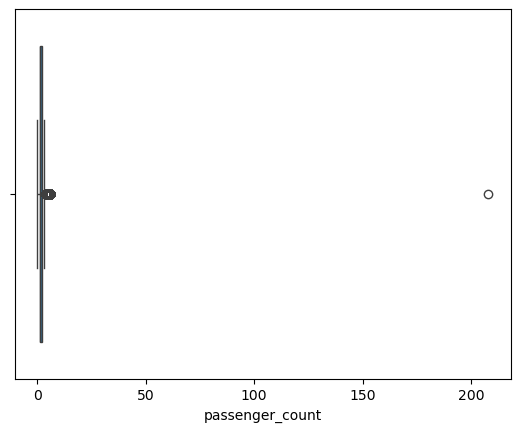

In [15]:
for col in df.select_dtypes(exclude=['object']):
    plt.figure()
    sns.boxplot(data=df,x=col)

### Dropping outliers

#### -90 < latitude < 90</br>-180 < longitude < 180 </br>fare > 0</br>0 < passenger_count < 50

In [8]:
df = df[
    (df.pickup_latitude > -90) & (df.pickup_latitude < 90) &
    (df.dropoff_latitude > -90) & (df.dropoff_latitude < 90) &
    (df.pickup_longitude > -180) & (df.pickup_longitude < 180) &
    (df.dropoff_longitude > -180) & (df.dropoff_longitude < 180) &
    (df.fare_amount > 0) & (df.passenger_count > 0)  & (df.passenger_count < 50)
]

### Calculating Distance

In [9]:
from math import cos, asin, sqrt, pi
import numpy as np

def distance(lat_1,lon_1,lat_2,lon_2):
#     lat1 = row.pickup_latitude
#     lon1 = row.pickup_longitude
#     lat2 = row.dropoff_latitude
#     lon2 = row.dropoff_longitude
    lon_1, lon_2, lat_1, lat_2 = map(np.radians, [lon_1, lon_2, lat_1, lat_2])  #Degrees to Radians


    diff_lon = lon_2 - lon_1
    diff_lat = lat_2 - lat_1


    km = 2 * 6371 * np.arcsin(np.sqrt(np.sin(diff_lat/2.0)**2 +  np.cos(lat_1) * np.cos(lat_2) * np.sin(diff_lon/2.0)**2))

    return km

In [10]:
temp = distance(df['pickup_latitude'],df['pickup_longitude'],df['dropoff_latitude'],df['dropoff_longitude'])
temp.head()

0    1.683323
1    2.457590
2    5.036377
3    1.661683
4    4.475450
dtype: float64

In [11]:
df_new = df.copy()
df_new['Distance'] = temp
df = df_new
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1.683323
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2.457590
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,5.036377
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1.661683
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,4.475450


<Axes: xlabel='Distance'>

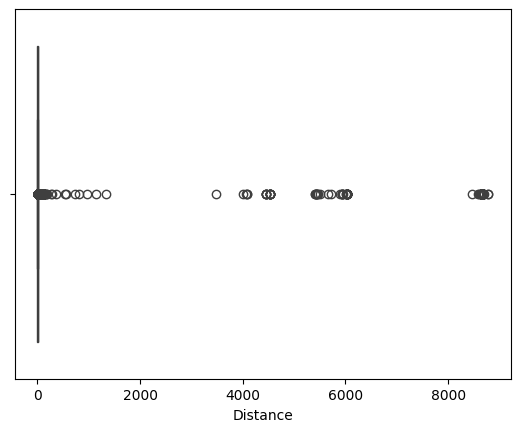

In [12]:
sns.boxplot(data=df,x='Distance')

In [13]:
df = df[(df['Distance'] < 200) & (df['Distance'] > 0)]

### Date and Time features extract

In [14]:
df = df.copy() # Explicitly create a copy to avoid SettingWithCopyWarning
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['week_day'] = df['pickup_datetime'].dt.day_name()
df['Year'] = df['pickup_datetime'].dt.year
df['Month'] = df['pickup_datetime'].dt.month
df['Hour'] = df['pickup_datetime'].dt.hour

In [15]:
df.drop(columns=['pickup_datetime','pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude'],inplace=True)

In [16]:
df.head()

,fare_amount,passenger_count,Distance,week_day,Year,Month,Hour
0,7.5,1,1.683323,Thursday,2015,5,19
1,7.7,1,2.457590,Friday,2009,7,20
2,12.9,1,5.036377,Monday,2009,8,21
3,5.3,3,1.661683,Friday,2009,6,8
4,16.0,5,4.475450,Thursday,2014,8,17


In [17]:
temp = df.copy()

def convert_week_day(day):
    if day in ['Monday','Tuesday','Wednesday','Thursday']:
        return 0 # Weekday
    return 1 # Weekend

def convert_hour(hour):
    if 5 <= hour <= 12:
        return 1
    elif 12 < hour <= 17:
        return 2
    elif 17 < hour < 24:
        return 3
    return 0

df['week_day'] = temp['week_day'].apply(convert_week_day)
df['Hour'] = temp['Hour'].apply(convert_hour)
df.head()


,fare_amount,passenger_count,Distance,week_day,Year,Month,Hour
0,7.5,1,1.683323,0,2015,5,3
1,7.7,1,2.457590,1,2009,7,3
2,12.9,1,5.036377,0,2009,8,3
3,5.3,3,1.661683,1,2009,6,1
4,16.0,5,4.475450,0,2014,8,2


### Correlation Matrix

In [18]:
df.corr()

,fare_amount,passenger_count,Distance,week_day,Year,Month,Hour
fare_amount,1.000000,0.011884,0.778667,0.002305,0.120430,0.024120,-0.021078
passenger_count,0.011884,1.000000,0.005112,0.035882,0.005339,0.008818,0.013572
Distance,0.778667,0.005112,1.000000,0.014518,0.018617,0.007373,-0.022691
week_day,0.002305,0.035882,0.014518,1.000000,0.006910,-0.007328,-0.078129
Year,0.120430,0.005339,0.018617,0.006910,1.000000,-0.115182,0.001131
Month,0.024120,0.008818,0.007373,-0.007328,-0.115182,1.000000,-0.005410
Hour,-0.021078,0.013572,-0.022691,-0.078129,0.001131,-0.005410,1.000000


<Axes: xlabel='Distance', ylabel='fare_amount'>

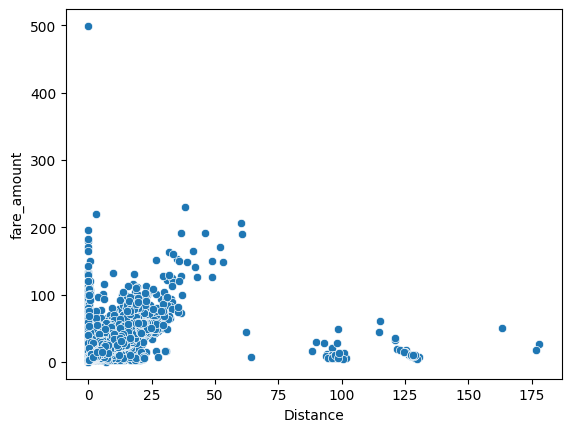

In [19]:
sns.scatterplot(y=df['fare_amount'],x=df['Distance'])

#### Independent Variable: Distance </br> Dependent Variable: fare_amount

In [20]:
from sklearn.preprocessing import StandardScaler
x = df[['Distance']].values
y = df['fare_amount'].values.reshape(-1,1)

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x,y,random_state=10)

In [22]:
std_x = StandardScaler()
x_train = std_x.fit_transform(x_train)

In [23]:
x_test = std_x.transform(x_test)

In [24]:
std_y = StandardScaler()
y_train = std_y.fit_transform(y_train)

In [25]:
y_test = std_y.transform(y_test)

In [26]:
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
def fit_predict(model):
    model.fit(x_train,y_train.ravel())
    y_pred = model.predict(x_test)
    r_squared = r2_score(y_test,y_pred)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred)) # Removed squared=False and used np.sqrt()
    MAE = mean_absolute_error(y_test,y_pred)
    print('R-squared: ', r_squared)
    print('RMSE: ', RMSE)
    print("MAE:  ",MAE)

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
fit_predict(LinearRegression())

R-squared:  0.6041167920841171
RMSE:  0.6290054895695945
MAE:   0.27552329590959806


In [29]:
from sklearn.ensemble import RandomForestRegressor
fit_predict(RandomForestRegressor())

R-squared:  0.6508075663924597
RMSE:  0.5907494251394526
MAE:   0.29221074307403333
